In [120]:
import pandas as pd
import numpy as np
import os
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

In [107]:
os.listdir()

['.ipynb_checkpoints',
 'Copy of Survey Data--08-27-18.xlsx',
 'Survey Result - Peidmont Environment Council.ipynb',
 '~$Copy of Survey Data--08-27-18.xlsx']

In [108]:
ip_file = "Copy of Survey Data--08-27-18.xlsx"
survey = pd.read_excel(ip_file)
survey.shape

(799, 14)

In [109]:
#Removing first 5 records which has test entries
survey = survey.iloc[5:,]
survey.reset_index = True

In [110]:
survey.iloc[0,12]

'Contiguous bike lanes throughout town; Greenways that connect without being on roads with cars; RTF/City to Monticello'

In [111]:
#Selecting the 12th question to detect some patterns in text data
print(survey.columns[12])

12. Please suggest any specific connections between places or neighborhoods that could make it easier and better to walk, bike, or run. 


In [112]:
q_12_values = survey.iloc[:,12][~survey.iloc[:,12].isnull()]

In [240]:
# Removing all the reviews containing crozet values
q_12_values = q_12_values[~q_12_values.str.lower().str.contains('crozet')]

In [241]:
#Tokenizing all the answers to get word level data
tokens_col = q_12_values.apply(word_tokenize)

In [242]:
#Getting the stopwords from the english language
from nltk.corpus import stopwords
eng_words = set(stopwords.words('english'))

### Standardizing text (lower) and removing stopwords

In [243]:
all_words = []
for each in tokens_col:
    words_lower = [words.lower() for words in each if words.lower() not in eng_words]
    all_words.extend(words_lower)

In [244]:
all_words

['contiguous',
 'bike',
 'lanes',
 'throughout',
 'town',
 ';',
 'greenways',
 'connect',
 'without',
 'roads',
 'cars',
 ';',
 'rtf/city',
 'monticello',
 'cross',
 'rte',
 '29',
 'woodbrook',
 ';',
 'cross',
 'rio',
 'fashion',
 'square',
 'connect',
 'biscuit',
 'run',
 'trails',
 'southwood',
 ',',
 'avon',
 'st',
 ',',
 'wegmans',
 'shopping',
 'center',
 '.',
 'provide',
 'safe',
 'pedestrian/bike',
 'route',
 '64',
 '5th',
 'st',
 'avon',
 'st',
 'need',
 'bridge',
 'across',
 'meadow',
 'creek',
 'connect',
 'stonehenge/stonewater/village',
 'square',
 'neighborhoods',
 'trail',
 'system',
 'along',
 'john',
 'warner',
 'parkway',
 'tunnel',
 'rail',
 'road',
 'tracks',
 'near',
 'area',
 '.',
 'impossible',
 'reach',
 'park',
 'trail',
 '1',
 'block',
 'buffer',
 'west',
 'main',
 'street',
 '.',
 'much',
 'density',
 'yet',
 'zero',
 'connectivity',
 'open',
 'space',
 'thousands',
 'residents',
 '.',
 'want',
 'take',
 'bike',
 'ride',
 'park',
 ',',
 'must',
 'load',
 'vehi

In [245]:
#Calling the counter function to see most common words
word_counts = Counter(all_words)

In [251]:
word_counts.most_common(30)

[('.', 615),
 (',', 379),
 ('bike', 194),
 ('road', 118),
 ('would', 113),
 ('trail', 107),
 (')', 105),
 ('(', 102),
 ('park', 85),
 ('street', 85),
 ('trails', 66),
 ('downtown', 65),
 ('lanes', 64),
 ('city', 64),
 ('walk', 61),
 ('sidewalks', 60),
 ('!', 54),
 ('29', 53),
 ('rivanna', 51),
 ('connect', 50),
 ('sidewalk', 50),
 ('path', 49),
 ('get', 47),
 ('lane', 47),
 ('traffic', 47),
 ('along', 45),
 ('monticello', 44),
 ('area', 43),
 ('also', 42),
 ('safe', 41)]

In [252]:
# Common words excluding the stop words and common words - downtown, 29, rivanna, montincello

In [253]:
#Based on the counter, visulizing the word frequency as a word cloud

### Wordcloud

(-0.5, 699.5, 399.5, -0.5)

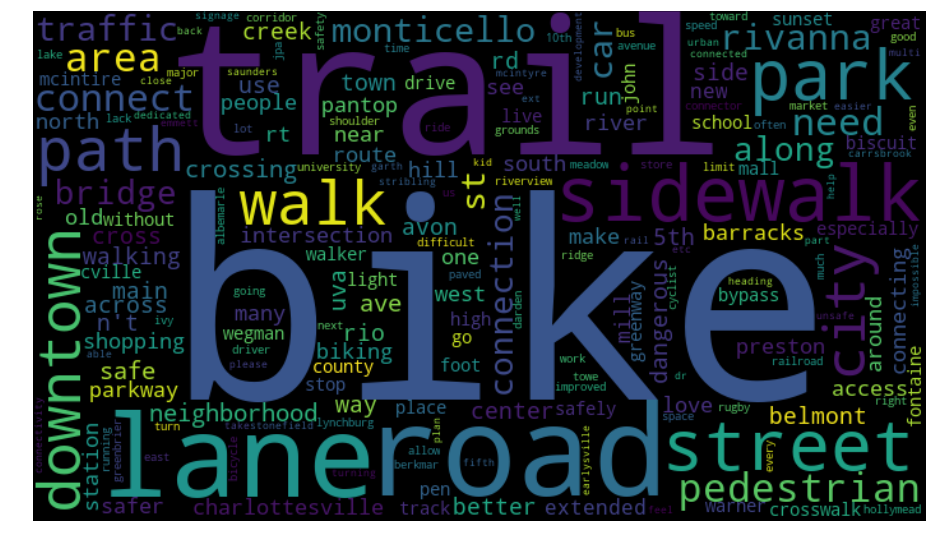

In [254]:
# Generate a word cloud image
# https://github.com/amueller/word_cloud/blob/master/examples/simple.py

text_corpus = ' '.join(all_words)
wordcloud = WordCloud(width=700, height=400,collocations = False).generate(text_corpus)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Analyzing the data by adjusting the font sizes

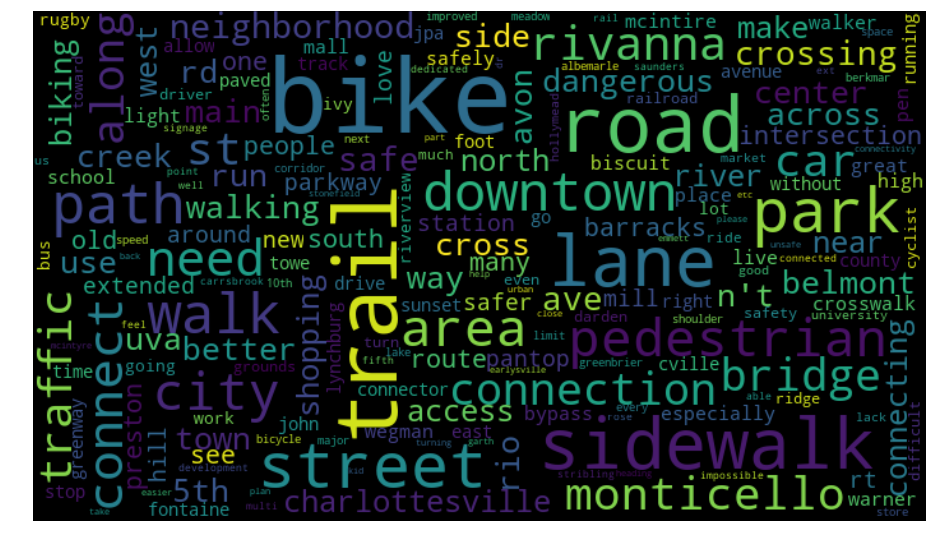

In [255]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=80,width=700, height=400,collocations = False).generate(text_corpus)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [256]:
import re

In [257]:
pd.options.display.max_colwidth = 1000

### Manually Analyzing some high frequency words

In [258]:
q_12_text = q_12_values[~q_12_values.apply(lambda x: re.search('downtown',x.lower())).isnull()]
print(len(q_12_text))
q_12_text

63


20                                        Connection from Ridge Street to the Rivanna trail near Wegmans- remove trees and extend sidewalk outward toward the street. Take away the beauty of the trees for safety, since there is no room to bike on the shoulder. Fully connect the Rivanna trail throughout the city, no off-roading, make the entire trail available to bikes and walkers. Add farmers market stands, street vendors and food trucks along the trail. Philadelphia is a super example for connectivity and incredible bike trails along the river full of breweries and small food vendors along the trails. There is so much more that Charlottesville can offer, but I wouldn't dare to bike in the downtown area due to insane traffic- no respect for bikers/walkers, no cross walks, no one stops for cross walks, and no trail connectivity away from the roads. Almost all of my friends have bikes and none of us use them unless we hitch them to our cars and start outside of town on the old railroad tr